# Requirments installation

In [1]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np

# Analysis on IMDB movies

In [3]:
imdb_100_df = pd.read_csv("imdb_100.csv")

In [4]:
print(f"There are {imdb_100_df.shape[0]} rows and {imdb_100_df.shape[1]} columns")
imdb_100_df_col = ", ".join((imdb_100_df.columns))
print(f"The column names are {imdb_100_df_col}")
imdb_100_df['genre'] = imdb_100_df['genre'].str.strip()
imdb_100_df_genre_unique_list = imdb_100_df['genre'].unique().tolist()
print(f"There {len(imdb_100_df_genre_unique_list)} unique genres in this table. ")
print(imdb_100_df.groupby('genre')['title'].count())

There are 100 rows and 7 columns
The column names are star_rating, title, year, content_rating, genre, duration, gross
There 10 unique genres in this table. 
genre
Action       17
Adventure     9
Animation    10
Biography     5
Comedy        7
Crime        20
Drama        25
Horror        2
Mystery       2
Western       3
Name: title, dtype: int64


# Analysis with OMBD API

In [5]:
def get_OMDB_data(title): # Get data from OMDB API call 
    API_KEY = "f9976297"
    url = 'http://www.omdbapi.com/'
    myobj = {'t': title, 'apikey': API_KEY}
    result = requests.get(url, params = myobj)
    result = result.json()
    return result

def p2f(x):
    return float(x.strip('%'))

imdb_100_df['Rotten Tomato Score'] = 0
for index, row in imdb_100_df.iterrows():
    score = get_OMDB_data(row['title']).get('Ratings')
    if score:
        score_dict = {}
        for i in score:
            score_dict[i['Source']] = i['Value']
        if score_dict.get('Rotten Tomatoes'):
            RT_score = p2f(score_dict.get('Rotten Tomatoes'))
        else:
            RT_score = np.nan
    else:
        RT_score = np.nan
    imdb_100_df['Rotten Tomato Score'][index] = RT_score
    


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Rotten Tomato Question

## What are the top five R-Rated movies under Rotten Tomato Score?

In [6]:
## What are the top five R-Rated movies under Rotten Tomato Score?
imdb_100_df_top_5_with_R_Rated_RTS = imdb_100_df[imdb_100_df['content_rating']=='R'].sort_values('Rotten Tomato Score',ascending = False).head(5)
print(f"{', '.join(imdb_100_df_top_5_with_R_Rated_RTS['title'].tolist())} is the top 5 rating movies under Rotten Tomato Score")

Citizen Kane, Toy Story, L.A. Confidential, Alien, Toy Story 3 is the top 5 rating movies under Rotten Tomato Score


## What are the top five R-Rated movies under imdb star rating?


In [7]:
## What are the top five R-Rated movies under imdb star rating?
imdb_100_df_top_5_with_R_Rated_IMDB = imdb_100_df[imdb_100_df['content_rating']=='R'].sort_values('star_rating',ascending = False).head(5)
print(f"{', '.join(imdb_100_df_top_5_with_R_Rated_IMDB['title'].tolist())} is the top 5 rating movies under IMDB rating")

The Shawshank Redemption, The Godfather, The Godfather: Part II, Pulp Fiction, Schindler's List is the top 5 rating movies under IMDB rating


## What is the average Rotten Tomato score for the top 100 IMDB films?

In [8]:
## What is the average Rotten Tomato score for the top 100 IMDB films?
print(f"The average Rotten Tomato score for the top 100 IMDB films is {imdb_100_df['Rotten Tomato Score'].mean()}")

The average Rotten Tomato score for the top 100 IMDB films is 91.24468085106383


## What is the Five Number Summary like for top rated films as per IMDB? Is it skewed?

In [9]:
## What is the Five Number Summary like for top rated films as per IMDB? Is it skewed?
imdb_100_df_IMDB = imdb_100_df['star_rating'].describe()
print(imdb_100_df_IMDB) 

count    100.000000
mean       8.524000
std        0.207009
min        8.300000
25%        8.400000
50%        8.500000
75%        8.600000
max        9.300000
Name: star_rating, dtype: float64


As we can see, the graph is skewed to the left.

## Create a column that is the ratio between Rotten Tomato rating vs IMDB rating. What film has the highest IMDB : Rotten Tomato ratio? The lowest?

In [10]:
## Create a column that is the ratio between Rotten Tomato rating vs IMDB rating. What film has the highest IMDB : Rotten Tomato ratio? The lowest?
imdb_100_df['IMDB rating vs Rotten Tomato rating'] = imdb_100_df['star_rating']/imdb_100_df['Rotten Tomato Score']
highest_ratio_movie = imdb_100_df.sort_values('IMDB rating vs Rotten Tomato rating',ascending = False)['title'].head(1)
lowest_ratio_movie = imdb_100_df.sort_values('IMDB rating vs Rotten Tomato rating',ascending = True)['title'].head(1)
print(f"The highest ratio movie is {highest_ratio_movie.to_string(index=False)}, and the lowest ratio movie is {lowest_ratio_movie.to_string(index=False)}")

The highest ratio movie is Forrest Gump, and the lowest ratio movie is Toy Story


## Create your own question... then answer it! What is the most profitable movie per duration?

In [11]:
## Create your own question... then answer it!
## What is the most profitable movie per duration?
imdb_100_df['gross per duration'] = imdb_100_df['gross']/imdb_100_df['duration']
highest_gross_per_duration = imdb_100_df.sort_values('gross per duration',ascending = False)['title'].head(1)
print(f"The most profitable movie per duration movie is {highest_gross_per_duration.to_string(index=False)}")

The most profitable movie per duration movie is One Flew Over the Cuckoo's Nest


# Data Visualization using Plot

## What is the relationship between IMDB ratings and Rotten Tomato ratings?

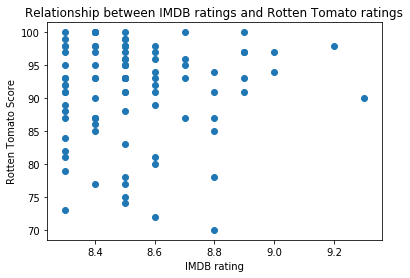

In [12]:
plt.scatter(imdb_100_df['star_rating'], imdb_100_df['Rotten Tomato Score'])
plt.title("Relationship between IMDB ratings and Rotten Tomato ratings")
plt.xlabel("IMDB rating")
plt.ylabel("Rotten Tomato Score")
plt.show()

As we can see, the higher the IMDB rating, the lower possibility the Rotten Tomato Score will be high. We see there are more movies under the cluster on the top left corner than under the cluster on the bottom right corner.

## What is the relationship between IMDB rating and movie duration?

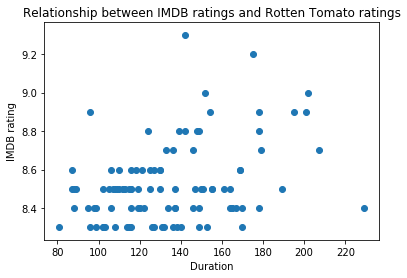

In [13]:
plt.scatter(imdb_100_df['duration'],imdb_100_df['star_rating'])
plt.title("Relationship between IMDB ratings and Rotten Tomato ratings")
plt.xlabel("Duration")
plt.ylabel("IMDB rating")
plt.show()

As we can see, the higher the duration, the higher the IMDB rating. 

## How many movies are there in each category?

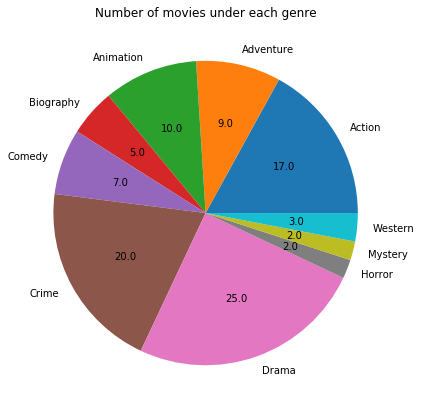

In [14]:
imdb_group_by_genre_genre_list = imdb_100_df.groupby(imdb_100_df.genre).count().reset_index()['genre'].tolist()
imdb_group_by_genre_score_list = imdb_100_df.groupby(imdb_100_df.genre).count()['star_rating'].tolist()
fig = plt.figure(figsize =(10, 7)) 
def absolute_value(val):
    a = np.round(val/100.*np.array(imdb_group_by_genre_score_list).sum(),0)
    return a
plt.pie(imdb_group_by_genre_score_list,labels = imdb_group_by_genre_genre_list, autopct = absolute_value)
plt.title("Number of movies under each genre")
plt.show()

## What does the distribution of Rotten Tomato ratings look like?

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


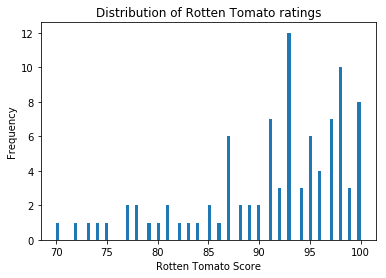

In [15]:
plt.hist(imdb_100_df['Rotten Tomato Score'], bins=100)
plt.ylabel('Frequency')
plt.xlabel('Rotten Tomato Score')
plt.title('Distribution of Rotten Tomato ratings')
plt.show()

The distribution is strewed to left.

# Learning Checkpoints for Students:
During this course, we learn the following topics:
- Discovery and perform basic data analysis
- Calling and perform data extraction throught API calls and JSON format file
- Perform further data analysis using data visualization 